Load HyperParameters

In [1]:
from neat_src import loadHyp, updateHyp
from domain import load_task
from neat_src import DataGatherer, Neat 
from domain.config import games
from domain.task_gym import GymTask

game = games["slimevolley"]
task = GymTask(game)

hyp_default = 'p/default_neat.json'
hyp_adjust = "p/volley.json"
fileName = "volley"

hyp = loadHyp(pFileName=hyp_default, load_task=load_task)
updateHyp(hyp,load_task,hyp_adjust)

hyp["cap_layer"] = 3
# neat = Neat(hyp)

	*** Running with hyperparameters:  p/volley.json 	***


#### Convert Policy model to Ind in Neat 

In [2]:
import json
import numpy as np
import gym, os
import slimevolleygym
import slimevolleygym.mlp as mlp
from slimevolleygym.mlp import games as games
from slimevolleygym.mlp import Model
from slimevolleygym import multiagent_rollout as rollout


# Settings
random_seed = 612
population_size = 128
total_tournaments = 500000
save_freq = 1000


# Log results
logdir = "ga_rotation_je"
if not os.path.exists(logdir):
  os.makedirs(logdir)

def mutate(param, param_count):
  return param + np.random.normal(size=param_count) * 0.1

curr_policy = Model(games['slimevolleylite'])
prev_policy = Model(games['slimevolleylite'])

/var/folders/nn/nbsb8w3570zfgs23h2s0cdzm0000gn/T/ipykernel_15821/869475039.py:26: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  curr_policy = Model(games['slimevolleylite'])
/var/folders/nn/nbsb8w3570zfgs23h2s0cdzm0000gn/T/ipykernel_15821/869475039.py:27: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  prev_policy = Model(games['slimevolleylite'])


In [3]:
# indiv object --> policy model 

hidden_shapes = [2] # hidden layers shapes 
specific_policy = Model(games['slimevolleylite'], hidden_layers=hidden_shapes)

model = specific_policy 
params = list(zip(model.weight, model.bias)) # list of (w, b) tuples 


/var/folders/nn/nbsb8w3570zfgs23h2s0cdzm0000gn/T/ipykernel_15821/3244457810.py:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  specific_policy = Model(games['slimevolleylite'], hidden_layers=hidden_shapes)


# of Connections in ANN:  47


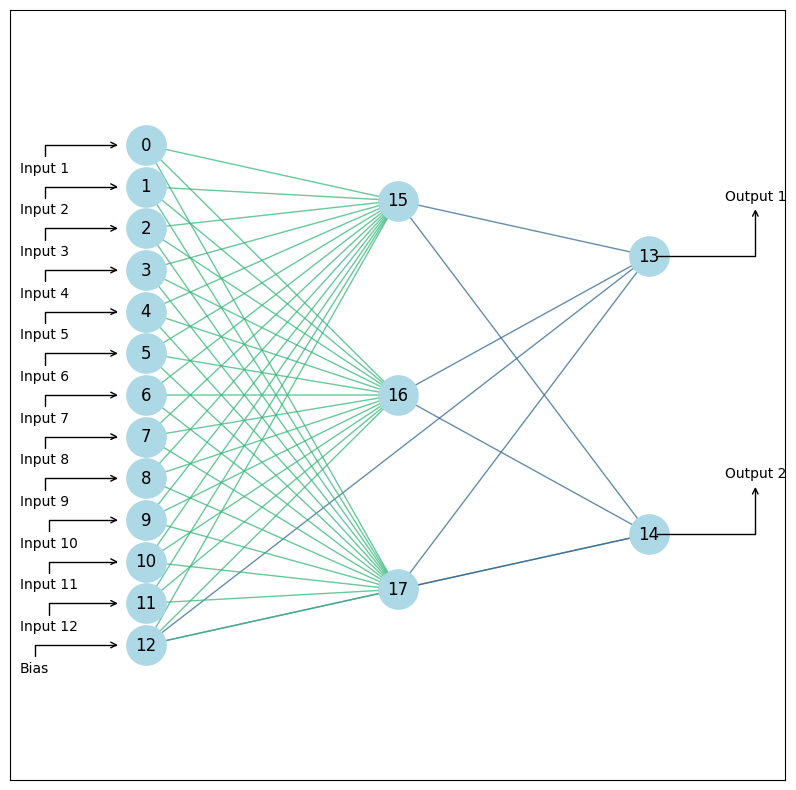

In [4]:
# Slime Environment Specific model -> Ind convertion function 
from neat_src import Ind, initIndiv
from vis.viewInd import viewInd 

temp_shapes = [(12, 3), (3, 2)] # debug getlayer functional variable 

indiv = Ind.from_shapes(temp_shapes)
indiv.express()

# visualize individual network 
fig, ax = viewInd(indiv, "slimevolley") # this is in-correct, edge is not correctly assigned ...

In [5]:
# Indiv --> Policy Model 
game = games['slimevolleylite']
# load_policy = Model.from_indiv(prev_indiv, game)

In [6]:
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import io

# Convert matplotlib figure to PIL Image
def fig2img(fig):
    # Save figure to a temporary buffer.
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    buf.seek(0)
    return Image.open(buf)


matplotlib.use('Agg')  # Use Agg backend for better memory management

frames = []  # Store frames

prev_indiv = Ind.from_shapes([(12, 3)])
prev_indiv.express()
connG, nodeG = prev_indiv.conn, prev_indiv.node
hyp['prob_addNode'] = 0.5
hyp['prob_addConn'] = 0.3

# Generate and store frames
for i in range(60):
    # Create new figure for each frame
    fig, ax = plt.subplots(figsize=(10, 10))
    
    child, innov = prev_indiv.mutate(hyp, gen=1)
    if child is False: 
        print("Failed to express :: Bad mutation")
        break 
    else:
        fig, ax = viewInd(child, "slimevolley")
        prev_indiv = child 
        
        
    connG, nodeG = prev_indiv.conn, prev_indiv.node
    img = fig2img(fig)
    frames.append(img)
    plt.close(fig)
 
    
# Save frames as GIF directly using PIL
frames[0].save(
    'network_evolution_mix.gif',
    save_all=True,
    append_images=frames[1:],
    duration=500,  # Duration for each frame in milliseconds
    loop=0        # 0 means loop forever
)


... Adding Node  16
... Adding Connection From  4.0  to  16.0
... Adding Connection From  16.0  to  14.0
# of Connections in ANN:  41
 :::: Adding Connection from  [12.]  to  [16.]
# of Connections in ANN:  42
... Adding Node  17
... Adding Connection From  11.0  to  17.0
... Adding Connection From  17.0  to  15.0
# of Connections in ANN:  44
... Adding Node  18
... Adding Connection From  2.0  to  18.0
... Adding Connection From  18.0  to  14.0
 :::: Adding Connection from  [3.]  to  [17.]
# of Connections in ANN:  47
# of Connections in ANN:  47
... Adding Node  19
... Adding Connection From  8.0  to  19.0
... Adding Connection From  19.0  to  15.0
# of Connections in ANN:  49
... Adding Node  20
... Adding Connection From  1.0  to  20.0
... Adding Connection From  20.0  to  14.0
# of Connections in ANN:  51
... Adding Node  21
... Adding Connection From  8.0  to  21.0
... Adding Connection From  21.0  to  13.0
# of Connections in ANN:  53
# of Connections in ANN:  53
# of Connection

/Users/fangyuanyu/Grow/SlimeBall/fineNeat/vis/viewInd.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10,10), dpi=100)
/var/folders/nn/nbsb8w3570zfgs23h2s0cdzm0000gn/T/ipykernel_15821/3470753947.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 10))


# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connections in ANN:  55
# of Connectio

# of Connections in ANN:  49


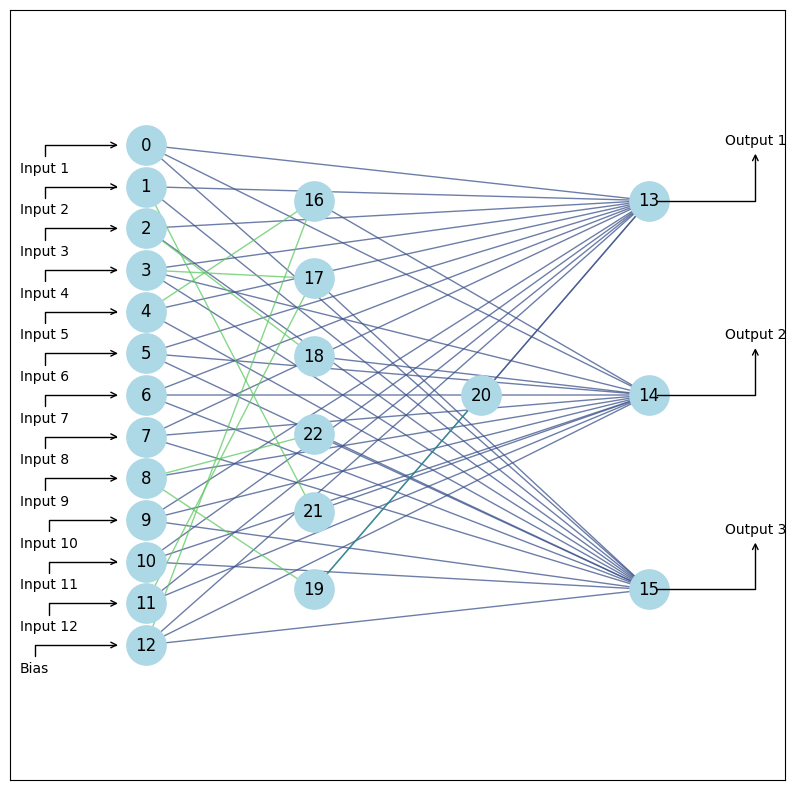

In [7]:
indiv = Ind(connG, nodeG)
indiv.express()

fig, ax = viewInd(prev_indiv, "slimevolley")
# fig, ax = viewInd(indiv, "slimevolley") # 2 -> 4 connection is not added here .. ()
fig

# connG, nodeG, _ = indiv.mutAddConn(connG, nodeG, None, 1, hyp)

In [27]:
nodeG, connG = indiv.node, indiv.conn
# connG_new, node_new, _ = indiv.mutAddConn(connG, nodeG, innov=None, gen=1)
connG_new, nodeG_new, _ = indiv.mutAddNode(connG, nodeG, None, 1, hyp)

# of Connections in ANN:  49


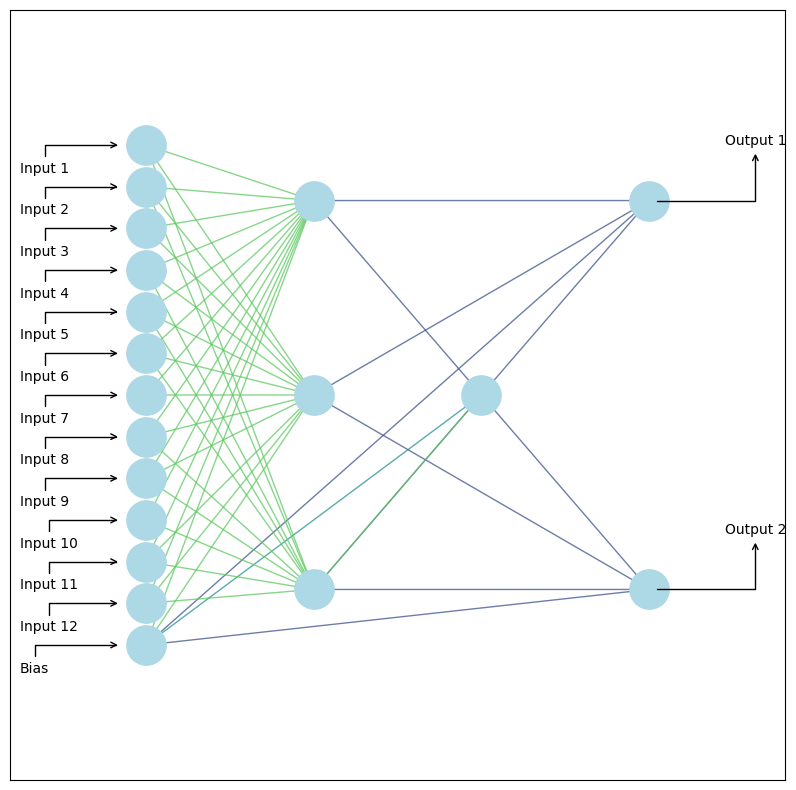

In [30]:
new_indiv = Ind(connG_new, nodeG_new)
new_indiv.express()
fig, ax = viewInd(new_indiv, "slimevolley") # this is in-correct, edge is not correctly assigned ...
